In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp

In [400]:
for col in df:
  print(df[col].unique())

['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']
['LA MER' 'SK-II' 'DRUNK ELEPHANT' 'IT COSMETICS' 'TATCHA'
 "KIEHL'S SINCE 1851" 'FRESH' 'BELIF' 'SUNDAY RILEY' 'FARMACY'
 'FIRST AID BEAUTY' 'CLINIQUE' 'BAREMINERALS' 'SHISEIDO'
 'CHARLOTTE TILBURY' 'ORIGINS' 'OLEHENRIKSEN' 'JOSIE MARAN' 'FARSÁLI'
 'LANEIGE' 'DR. JART+' 'GLOW RECIPE' 'HERBIVORE' 'TARTE' 'CAUDALIE'
 'YOUTH TO THE PEOPLE' 'BIOSSANCE' 'ESTÉE LAUDER' 'SON & PARK'
 'AMOREPACIFIC' 'BOBBI BROWN' 'ERBORIAN' 'SMASHBOX' 'GLAMGLOW'
 'PETER THOMAS ROTH' 'JACK BLACK' 'PHILOSOPHY' 'PERRICONE MD' 'LANCÔME'
 'ALGENIST' 'MAKE UP FOR EVER' 'KORRES' 'MURAD' 'GUERLAIN' 'DIOR'
 'KORA ORGANICS' 'DR. DENNIS GROSS SKINCARE' 'REN CLEAN SKINCARE' 'KOPARI'
 'CLARINS' 'NURSE JAMIE' 'LANCER' "L'OCCITANE" 'KATE SOMERVILLE'
 'SUPERGOOP!' 'SATURDAY SKIN' 'SEPHORA COLLECTION' 'MILK MAKEUP'
 'DR. BRANDT SKINCARE' 'J.ONE' 'KAT VON D' 'TATA HARPER' 'GO-TO' 'BOSCIA'
 'EVE LOM' 'MAKEUP ERASER' 'LAURA MERCIER' 'NEOGEN DERMALOGY' 

In [389]:
#showcasing the variety of brands
print(df.sort_values("Brand", axis=0, ascending=True,inplace=False, na_position='last'))

            Label                Brand  \
710     Treatment             ALGENIST   
662     Treatment             ALGENIST   
826     Treatment             ALGENIST   
1070    Face Mask             ALGENIST   
216   Moisturizer             ALGENIST   
...           ...                  ...   
1149    Eye cream  YOUTH TO THE PEOPLE   
51    Moisturizer  YOUTH TO THE PEOPLE   
115   Moisturizer  YOUTH TO THE PEOPLE   
326      Cleanser  YOUTH TO THE PEOPLE   
1284    Eye cream   YVES SAINT LAURENT   

                                                   Name  Price  Rank  \
710         GENIUS Ultimate Anti-Aging Vitamin C+ Serum    118   3.9   
662                      ELEVATE Advanced Retinol Serum     98   4.8   
826              ELEVATE Advanced Lift Contouring Cream     96   4.3   
1070  SPLASH Absolute Hydration Replenishing Sleepin...     48   3.6   
216   SUBLIME DEFENSE Ultra Lightweight UV Defense F...     28   4.4   
...                                                 ...    ... 

## Cleaning the Dataset

* Omit the skin type & label columns 
* finding any null values & omitting them, and replace with `fillna()` (guarantees 77% accuracy)
* luckily, there are no null values which means the data analysis will be more accurate.
* remove duplicate values (none)
* standardize Capitalizations ()
* change the data type object & int to float to ge the most accurate results
* check how varied the data is (Z Score) & determine if the data set is a good representation 
* remove empty strings
* remove empty lists
* remove empty dictionaries

In [391]:
#Omit the skin type & label columns
df = df.loc[:, ~df.columns.isin(['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'])]
df.head(5)


,Label,Brand,Name,Price,Rank,Ingredients
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


In [392]:
#Checking for null_values
null_values = df.isnull()
print(null_values)

      Label  Brand   Name  Price   Rank  Ingredients
0     False  False  False  False  False        False
1     False  False  False  False  False        False
2     False  False  False  False  False        False
3     False  False  False  False  False        False
4     False  False  False  False  False        False
...     ...    ...    ...    ...    ...          ...
1467  False  False  False  False  False        False
1468  False  False  False  False  False        False
1469  False  False  False  False  False        False
1470  False  False  False  False  False        False
1471  False  False  False  False  False        False

[1472 rows x 6 columns]


In [393]:
#checking for duplicates
duplicates = df.duplicated()
print(duplicates)

0       False
1       False
2       False
3       False
4       False
        ...  
1467    False
1468    False
1469    False
1470    False
1471    False
Length: 1472, dtype: bool


In [394]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Brand'] = le.fit_transform(df['Brand'])
df['Label'] = le.fit_transform(df['Label'])

df['Price'] = df['Price'].astype(float)
df['Label'] = df['Label'].astype(float)
df['Brand'] = df['Brand'].astype(float)

df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients
0,3.0,64.0,Crème de la Mer,175.0,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat..."
1,3.0,95.0,Facial Treatment Essence,179.0,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle..."
2,3.0,29.0,Protini™ Polypeptide Cream,68.0,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary..."
3,3.0,64.0,The Moisturizing Soft Cream,175.0,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P..."
4,3.0,49.0,Your Skin But Better™ CC+™ Cream with SPF 50+,38.0,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet..."


#### All numerical values are normalized to a float64

# Calculating the Z score to see the variedness of the dataset

## Rank & Price
1. Calculate the Z score using pandas

## Brand
1. Turn the brands column into a list
2. Assign an ID to the unique brands in the brand column
3. Change the dataframe to show the IDs instead of the Brand names
4. Calculate the Z score of the Brands list using pandas


In [395]:
from collections import defaultdict

brand_list = df['Brand'].tolist()

print("The original list : " + str(brand_list))

# using list comprehension + defaultdict + lambda
# assigning ids to values
temp = defaultdict(lambda: len(temp))
res = [temp[ele] for ele in brand_list]

# print result
#print("The ids of assigned values is : " + str(res))

print(res)
print(temp) # prints the ids for each brand

df['Brand']= pd.DataFrame(res)
df['Brand']

The original list : [64.0, 95.0, 29.0, 64.0, 49.0, 106.0, 29.0, 29.0, 57.0, 64.0, 40.0, 57.0, 7.0, 102.0, 35.0, 29.0, 38.0, 19.0, 40.0, 95.0, 64.0, 4.0, 94.0, 40.0, 7.0, 16.0, 29.0, 84.0, 19.0, 95.0, 40.0, 106.0, 82.0, 52.0, 49.0, 36.0, 67.0, 67.0, 95.0, 28.0, 106.0, 94.0, 19.0, 82.0, 102.0, 42.0, 45.0, 104.0, 102.0, 15.0, 15.0, 114.0, 64.0, 9.0, 104.0, 94.0, 84.0, 33.0, 99.0, 106.0, 82.0, 1.0, 12.0, 28.0, 15.0, 45.0, 31.0, 98.0, 102.0, 36.0, 49.0, 106.0, 41.0, 33.0, 28.0, 102.0, 40.0, 67.0, 1.0, 41.0, 35.0, 87.0, 1.0, 49.0, 40.0, 40.0, 38.0, 49.0, 94.0, 40.0, 84.0, 104.0, 19.0, 52.0, 67.0, 51.0, 42.0, 64.0, 64.0, 88.0, 86.0, 66.0, 0.0, 49.0, 28.0, 19.0, 52.0, 82.0, 94.0, 35.0, 84.0, 45.0, 82.0, 7.0, 16.0, 114.0, 95.0, 106.0, 57.0, 9.0, 94.0, 84.0, 94.0, 70.0, 49.0, 57.0, 12.0, 40.0, 62.0, 40.0, 7.0, 114.0, 76.0, 49.0, 104.0, 98.0, 38.0, 76.0, 33.0, 106.0, 44.0, 9.0, 24.0, 98.0, 84.0, 61.0, 67.0, 95.0, 27.0, 90.0, 76.0, 82.0, 24.0, 57.0, 38.0, 84.0, 9.0, 38.0, 76.0, 44.0, 40.0, 84.0, 6

0         0
1         1
2         2
3         0
4         3
       ... 
1467     41
1468     53
1469    113
1470     99
1471    115
Name: Brand, Length: 1472, dtype: int64

Z-Score Maxes & Mins



TypeError: can only concatenate str (not "numpy.float64") to str

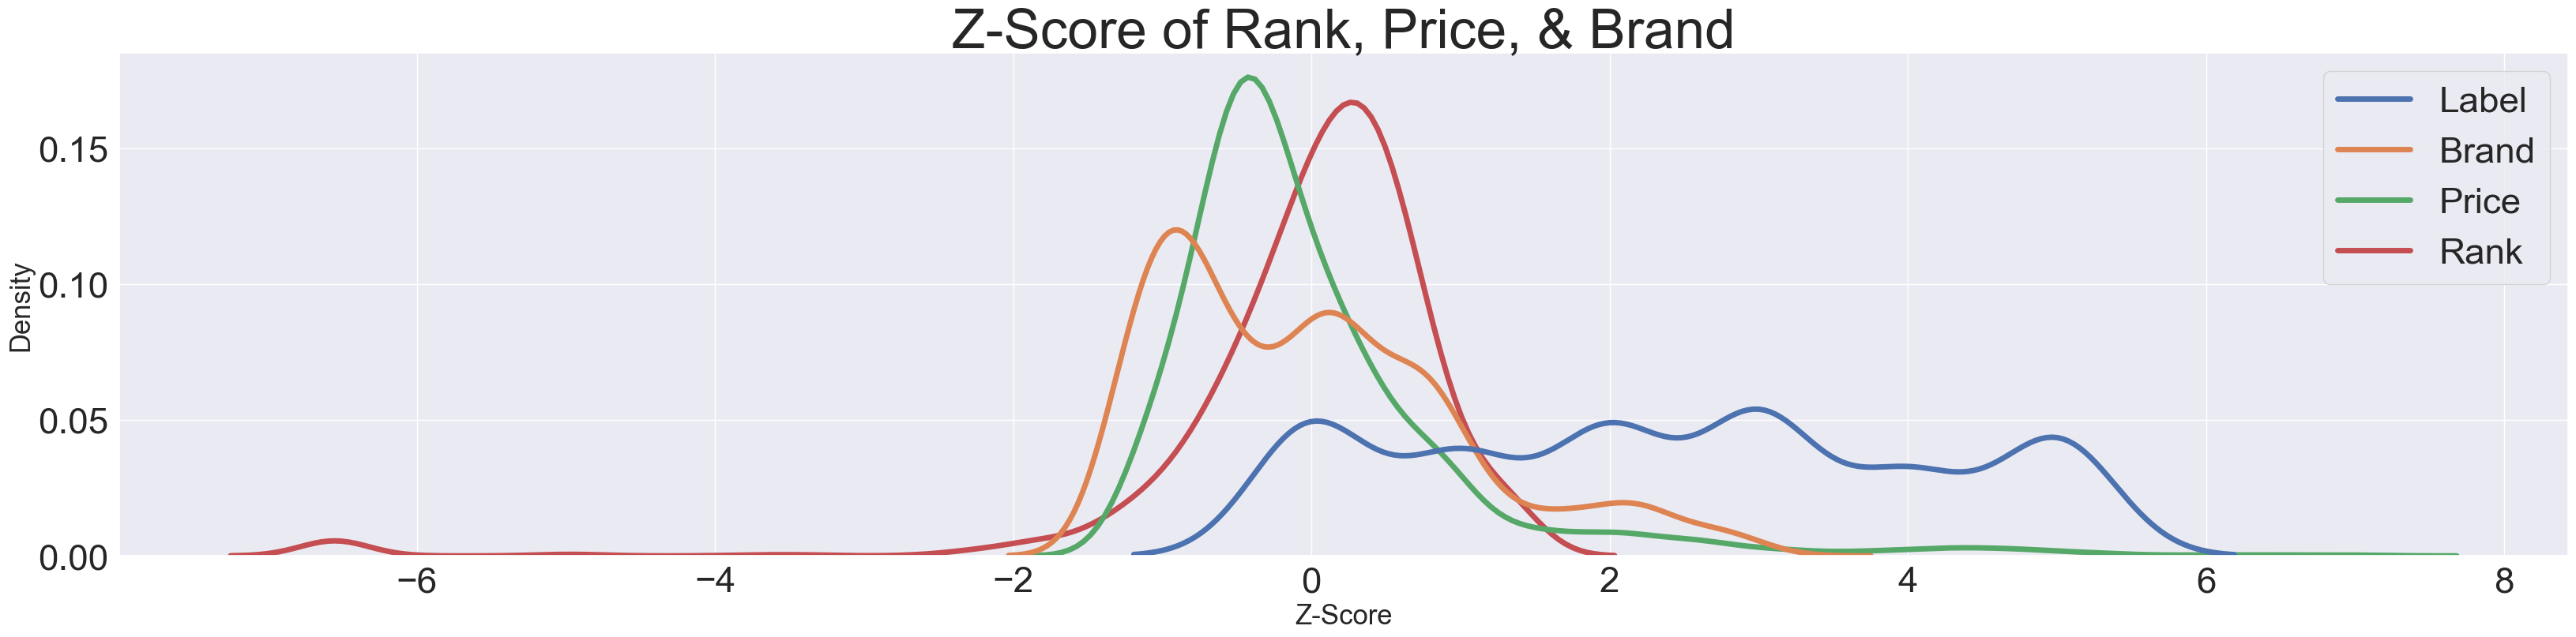

In [396]:
counts1 = df['Price'] =(df['Price'] - df['Price'].mean()) / df["Price"].std()

counts2 = df['Rank'] =(df['Rank'] - df['Rank'].mean()) / df["Rank"].std()

counts3 = df['Brand'] =(df['Brand'] - df['Brand'].mean()) / df["Brand"].std()

# print(counts3)

df['Price']
df['Rank']

ax = sns.kdeplot(
    data=df,
    linewidth = 5)

ax.set_title("Z-Score of Rank, Price, & Brand", size= 50)

ax.set_xlabel("Z-Score", size = 25)
#ax.set_xticklabels(ax.get_yticklabels(), size = 20)

ax.set_ylabel("Density", size = 25)
#ax.set_yticklabels(ax.get_yticklabels(), size=20)

price_min_z_score = df.min(axis=0)['Price']
price_max_z_score = df.max(axis=0)['Price']

rank_min_z_score = df.min(axis=0)['Rank']
rank_max_z_score = df.max(axis=0)['Rank']

brand_min_z_score = df.min(axis=0)['Brand']
brand_max_z_score = df.max(axis=0)['Brand']


print('Z-Score Maxes & Mins' + '\n')

print("Price (Min): " + price_min_z_score)
print("Price (Max): " + price_max_z_score)
print("Rank (Min): " + rank_min_z_score)
print("Rank (Max): " + rank_max_z_score)
print("Brand (Min): " + brand_min_z_score)
print("Brand (Max): " + brand_max_z_score)

## Z Score results

### Rank
* Z-Score is properly distributed 

### Price
* Z-Score is properly distributed

### Brand
* Z-Score is skwewed in several places.
* There is an abudance of certain brands

```mermaid
graph TD;
    A-->B;
    A-->C;
    B-->D;
    C-->D;    
```

## Visualizing the top 10 brands

In [ ]:
#counting the number of products a certain brand has in this data set
#only using pandas to visualize
df = pd.read_csv('cosmetics.csv')

df['Brand'].value_counts()

print(df['Brand'].value_counts()[:10])

CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: Brand, dtype: int64


Text(0.5, 0, 'Brands')

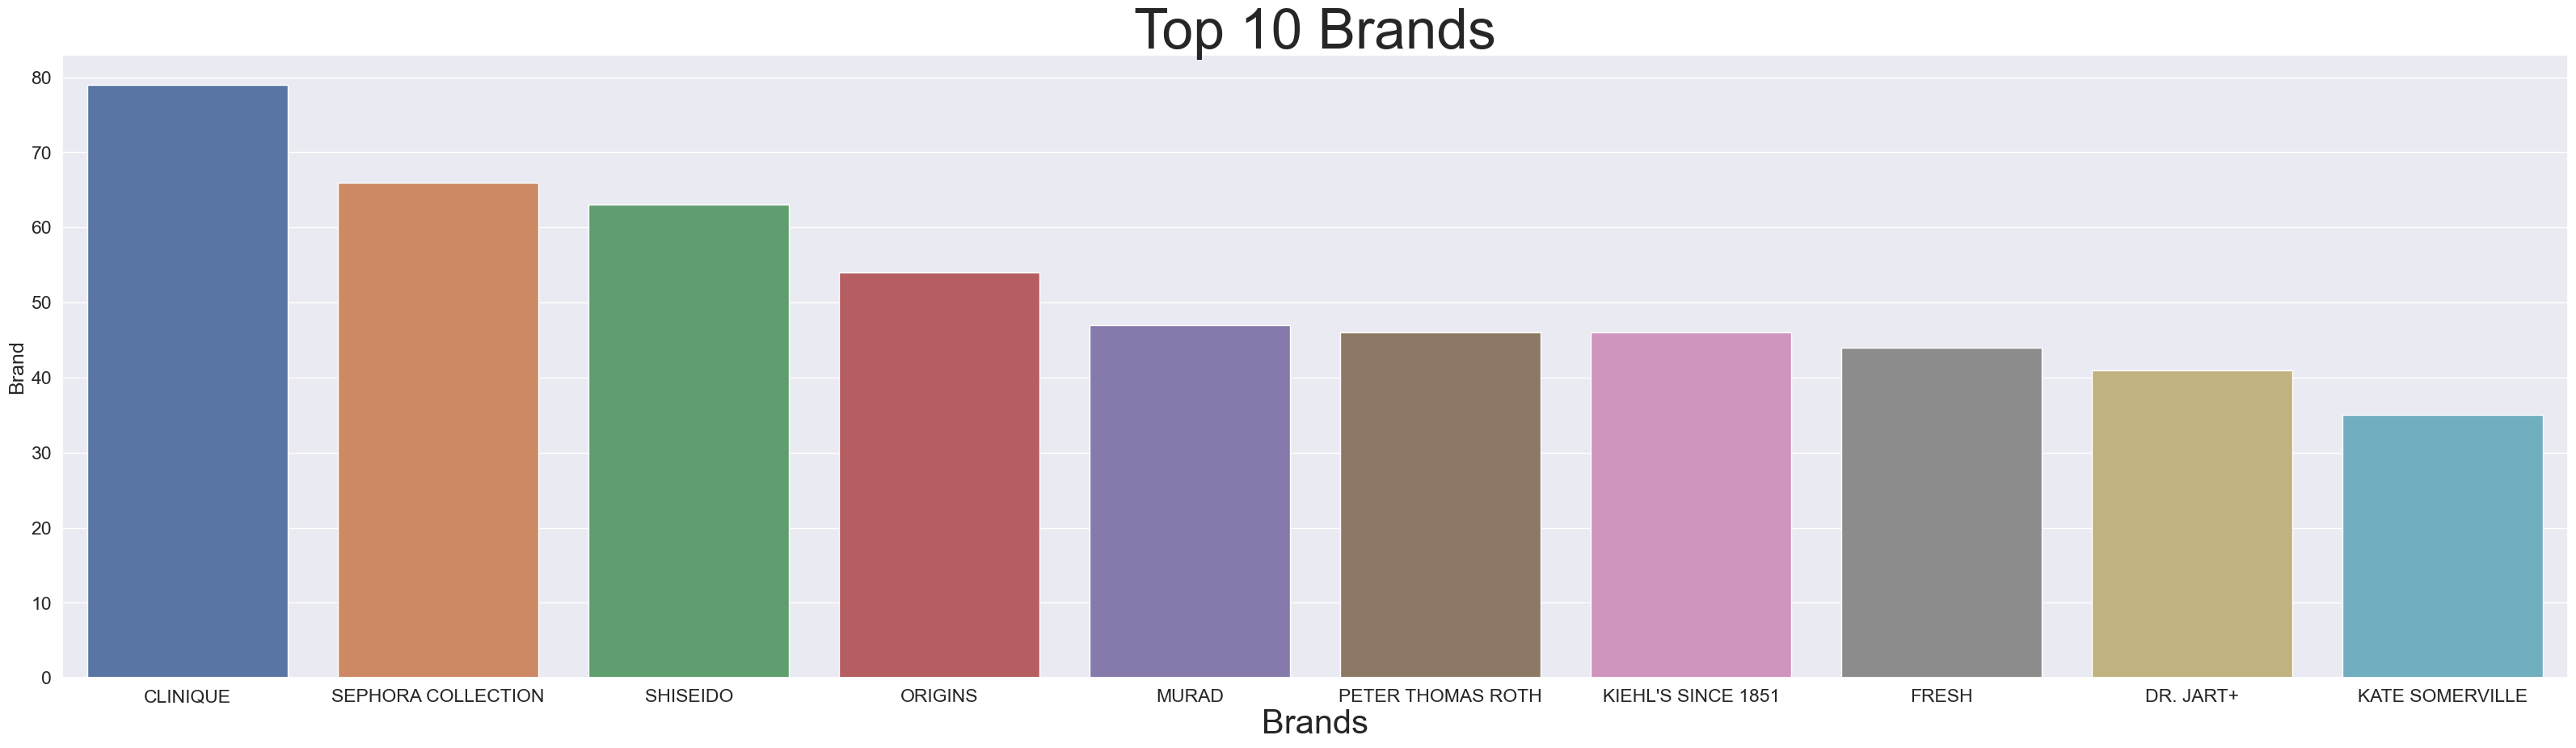

In [ ]:
#advantges of graphing in seaborn: ability to manipulate chart style, colors, and sizes
#shows the top 10 brands that occur in this data set
df = pd.read_csv('cosmetics.csv')

plt.figure(figsize=(40,10))
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

ax = sns.barplot(
    x=df['Brand'].value_counts()[:10].index, 
    y=df['Brand'].value_counts()[:10],
    data = df)

ax.set_title("Top 10 Brands", size= 50)


ax.set_xlabel("Brands", size = 30,)



## Styling the graphs 
* used fonts:
* imported fonts from HTML5 library
* colorized graphs based on this palette: 


In [ ]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

## Now we must search the ingredents column for common toxin names

### finding the variables occurances of each toxin in the ingredents column

131
499
1028
0
80
17
0
0
0
7
76
0


<AxesSubplot:>

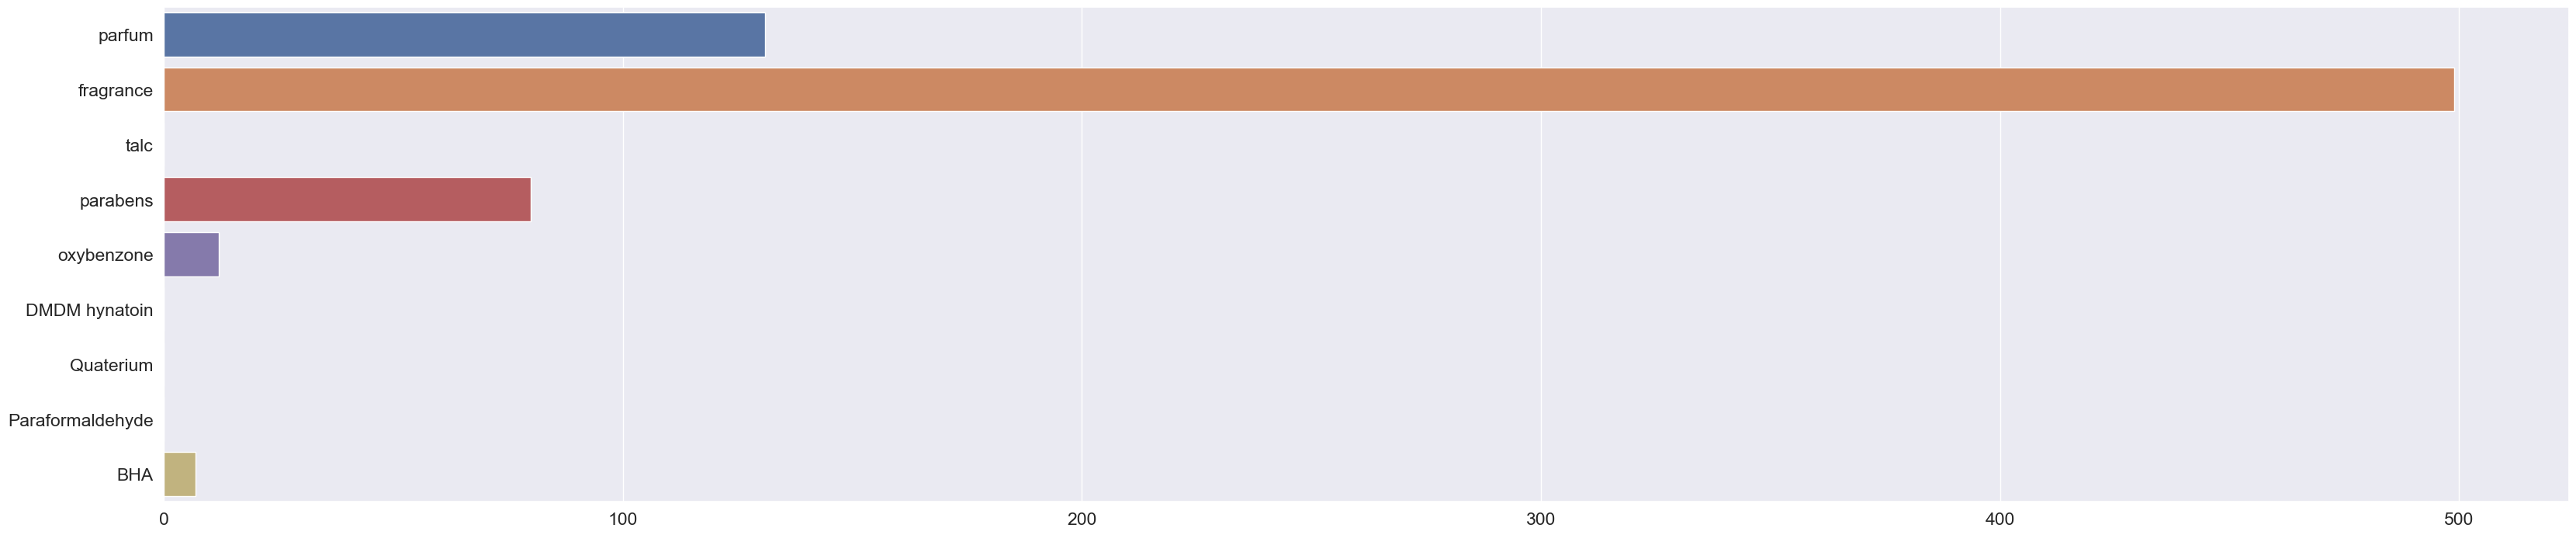

In [ ]:
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Glycol")].shape[0]


homosalate_occ = df[df['Ingredients'].str.contains("Homosalate")].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
DMDM_hyantoin_occ = df[df['Ingredients'].str.contains("DMDM hyantoin")].shape[0]
quaterium_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
paraformaldehyde_occ = df[df['Ingredients'].str.contains("quaterium")].shape[0]
bha_occ = df[df['Ingredients'].str.contains("BHA")].shape[0]
bht_occ = df[df['Ingredients'].str.contains('BHT')].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains('diethanolamine')].shape[0]

talc_occ = df[df['Ingredients'].str.contains("talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("paraben")].shape[0]


print(parfum_occ)
print(fragrance_occ)
print(glycol_occ)
print(talc_occ)
print(parabens_occ)
print(homosalate_occ)
print(DMDM_hyantoin_occ)
print(quaterium_occ)
print(paraformaldehyde_occ)
print(bha_occ)
print(bht_occ)
print(diethanolamine_occ)


x = [parfum_occ, fragrance_occ, talc_occ, parabens_occ, oxybenzone_occ, DMDM_hyantoin_occ, quaterium_occ, paraformaldehyde_occ, bha_occ ] 
y = ["parfum", "fragrance", "talc", "parabens", 'oxybenzone', 'DMDM hynatoin', 'Quaterium', 'Paraformaldehyde', 'BHA']
sns.barplot(x=x,y=y)

## Plotting the moderate-hazard chemcials

## Plotting the low hazard chemicals

findfont: Font family ['Franklin Gothic Medium'] not found. Falling back to DejaVu Sans.


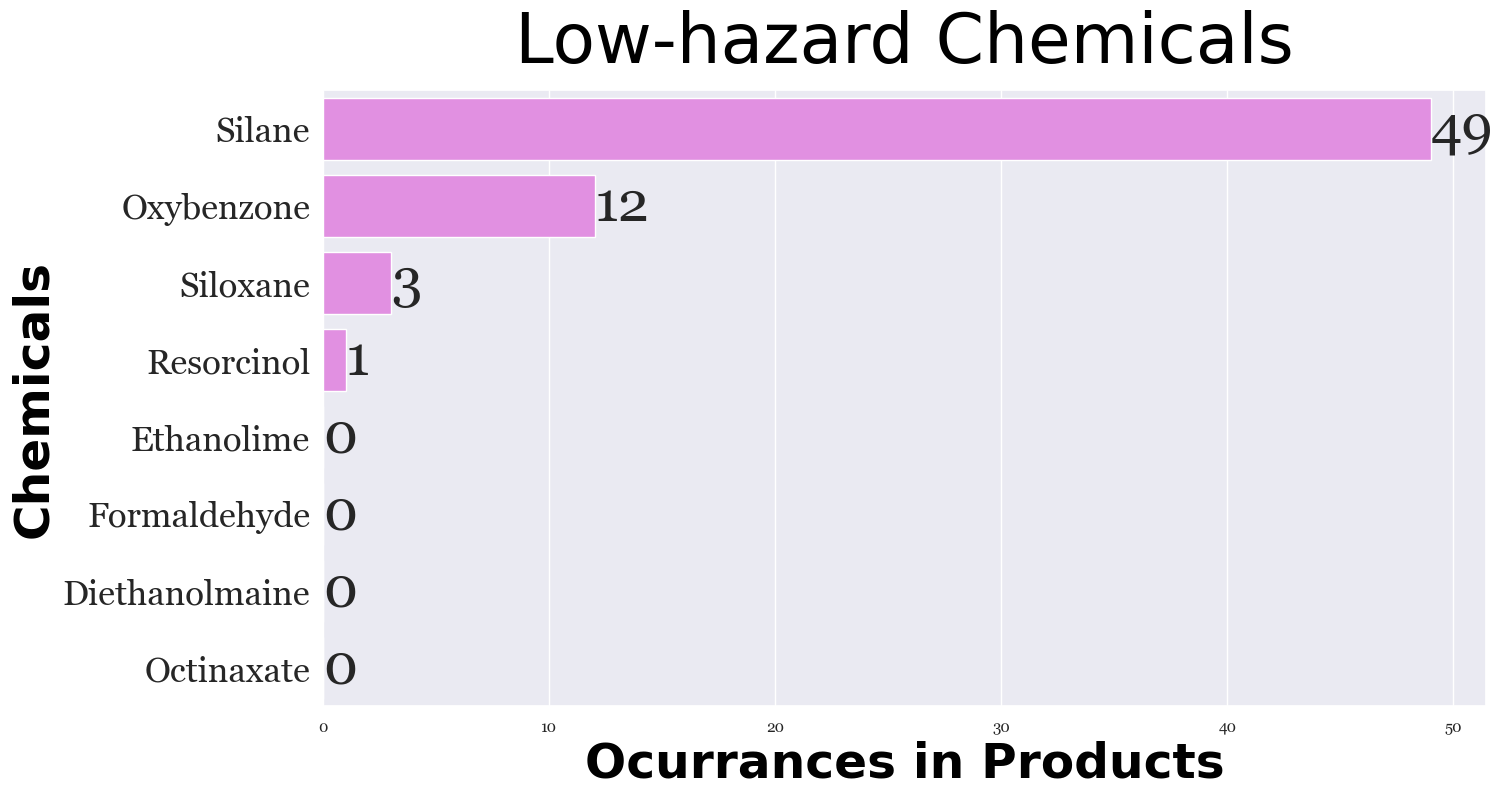

In [ ]:
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 35
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

occurances = [silanes_occ, oxybenzone_occ, siloxanes_occ, resorcinol_occ, ethanolamine_occ, formaldehyde_occ, diethanolamine_occ, octinaxate_occ]
chemicals = ['Silane', 'Oxybenzone', 'Siloxane', 'Resorcinol', 'Ethanolime', 'Formaldehyde', 'Diethanolmaine', 'Octinaxate']
ax = sns.barplot(x=occurances, y=chemicals,  color = 'violet')

ax.set_title('Low-hazard Chemicals', fontdict=title_font, pad=20)

ax.bar_label(ax.containers[0], size = 40) # shows the number of exact occurances on each bar

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)
# ax.set_xticklabels(ax.get_xticklabels(), size =20)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=25)
#plt.text(50, 1, 'allergens, harmful to the environment, cause irritation', fontdict = opt_font)

plt.show()

## Plotting the moderate-hazard chemcials

Text(0.5, 1.0, 'Moderate-hazard Chemicals')

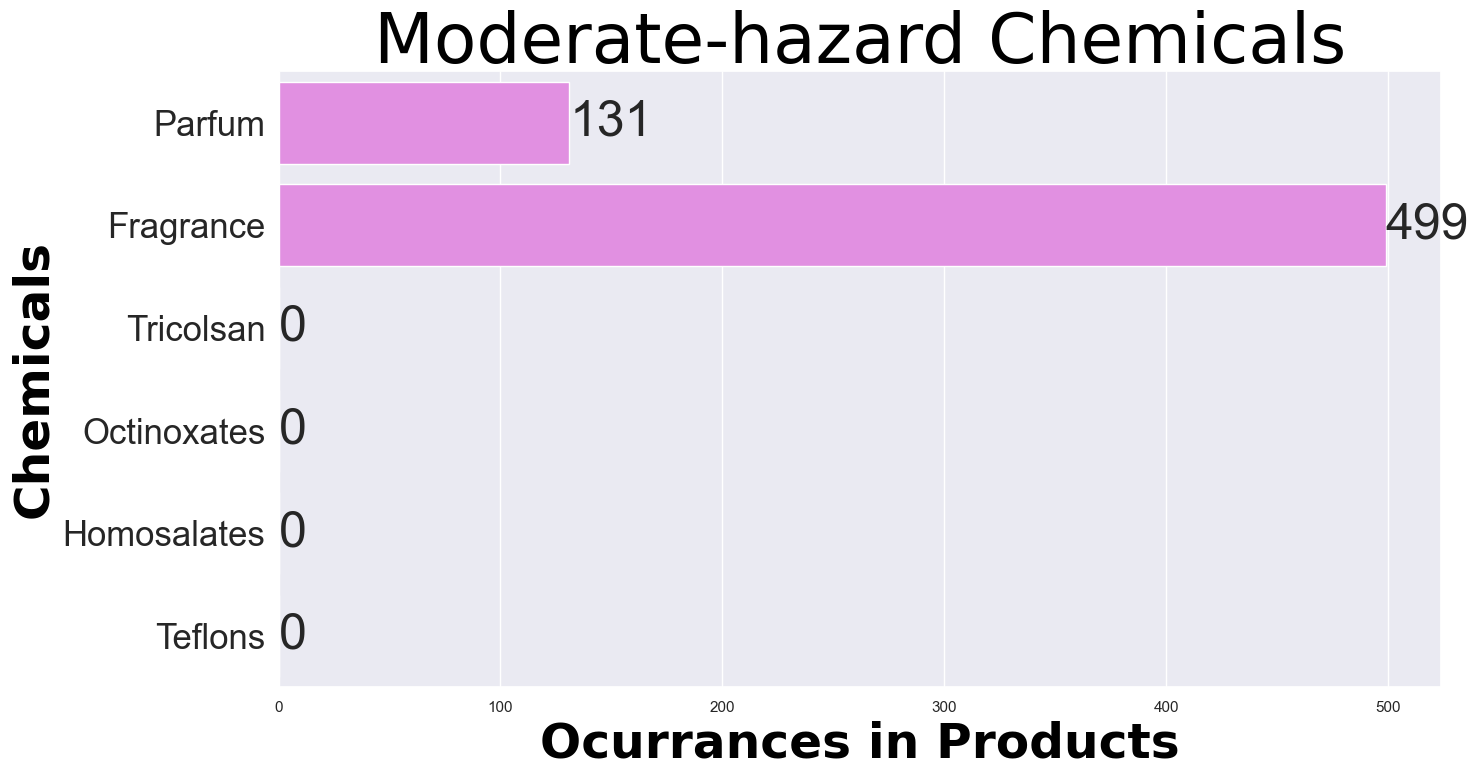

In [ ]:
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
triclosan_occ = df[df['Ingredients'].str.contains("triclosan")].shape[0]
octinoxates_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]
homosalate_occ = df[df['Ingredients'].str.contains("homosalate")].shape[0]
teflon_occ = df[df['Ingredients'].str.contains("teflon")].shape[0]


occurances = [parfum_occ, fragrance_occ, triclosan_occ, octinoxates_occ, homosalate_occ, teflon_occ]
chemicals = ['Parfum', 'Fragrance', 'Tricolsan', 'Octinoxates', 'Homosalates', 'Teflons']
ax = sns.barplot(x=occurances, y=chemicals,  color = 'violet')

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 35
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

ax.bar_label(ax.containers[0])

#sns.set_style("whitegrid")
#plt.set(rc={'axes.facecolor': lightblue, 'figures.facecolor': lightblue})

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=25)
# plt.text(-5, 1, 'endocrine disruptors, estrogen mimickers', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Moderate-hazard Chemicals', fontdict=title_font)


## Plotting the high-hazard chemcials

[Text(0, 0, 'Talc'), Text(0, 1, 'Parabens'), Text(0, 2, 'Glycol')]

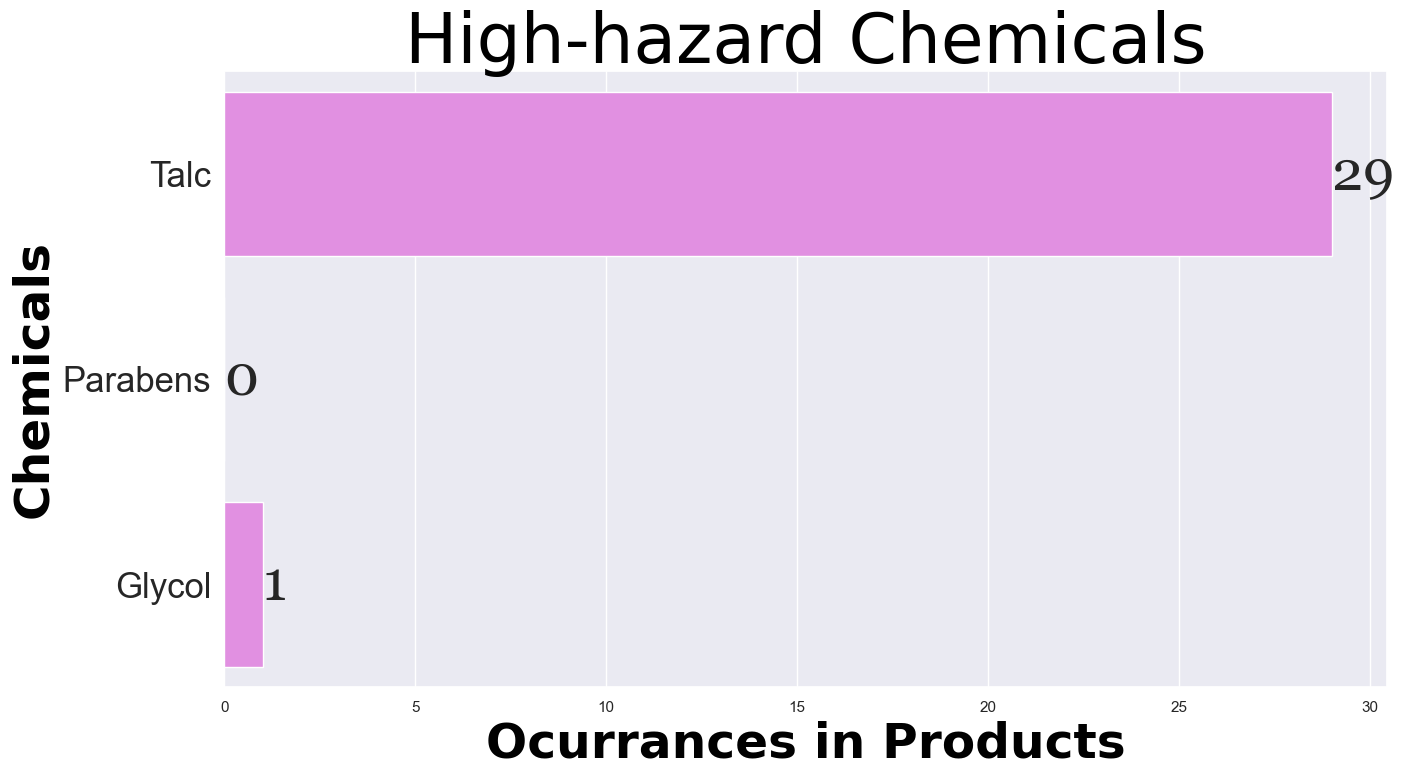

In [ ]:
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Polyethylene Glycol")].shape[0]

occurances = [talc_occ, parabens_occ, glycol_occ]
chemicals = ['Talc', 'Parabens', 'Glycol']
ax = sns.barplot(x= occurances, y= chemicals, color="violet")
ax.set_title('High-hazard Chemicals', fontdict=title_font)


# sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 35
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}


ax.bar_label(ax.containers[0], size=40)

sns.set(rc={'figure.figsize':(15,8)})
ax.set_xlabel("Ocurrances in Products", fontdict= label_font)

ax.set_ylabel("Chemicals", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=25)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)



## Plotting the brands with the highest number of toxins in a heatmap

In [ ]:
import pandas as pd

list = ['ethanolamine', 'oxybenzone', 'resorcinol', 'diethanolamine', 'silanes', 'siloxanes', 'octinaxate', 'parfum', 'fragrance', 'homosalate', 'teflon', 'talc', 'paraben', 'bha', 'bht', 'polethylene glycol']

df = pd.read_csv('cosmetics.csv')

test = df[df['Ingredients'].str.contains([list])].shape[0]

print(test)

    i=0
    while i < len(list):
        if test < 1:
            counter = counter + 1
            
        else:
            print(counter)

IndentationError: unexpected indent (2294807057.py, line 11)

In [ ]:
list = ['ethanolamine', 'oxybenzone', 'resorcinol', 'diethanolamine', 'silanes', 'siloxanes', 'octinaxate', 'parfum', 'fragrance', 'homosalate', 'teflon', 'talc', 'paraben', 'bha', 'bht', 'polethylene glycol']

rstr ='|'.join(list)

#test = df[df['Ingredients'].str.contains(rstr).to_string()]

#test1 = df[df['Ingredients'].str.contains('parfum').to_string()]

print(df[df['Ingredients'].str.contains("Parfum")].to_string())


## Price vs. Cost - Linear Regression Model

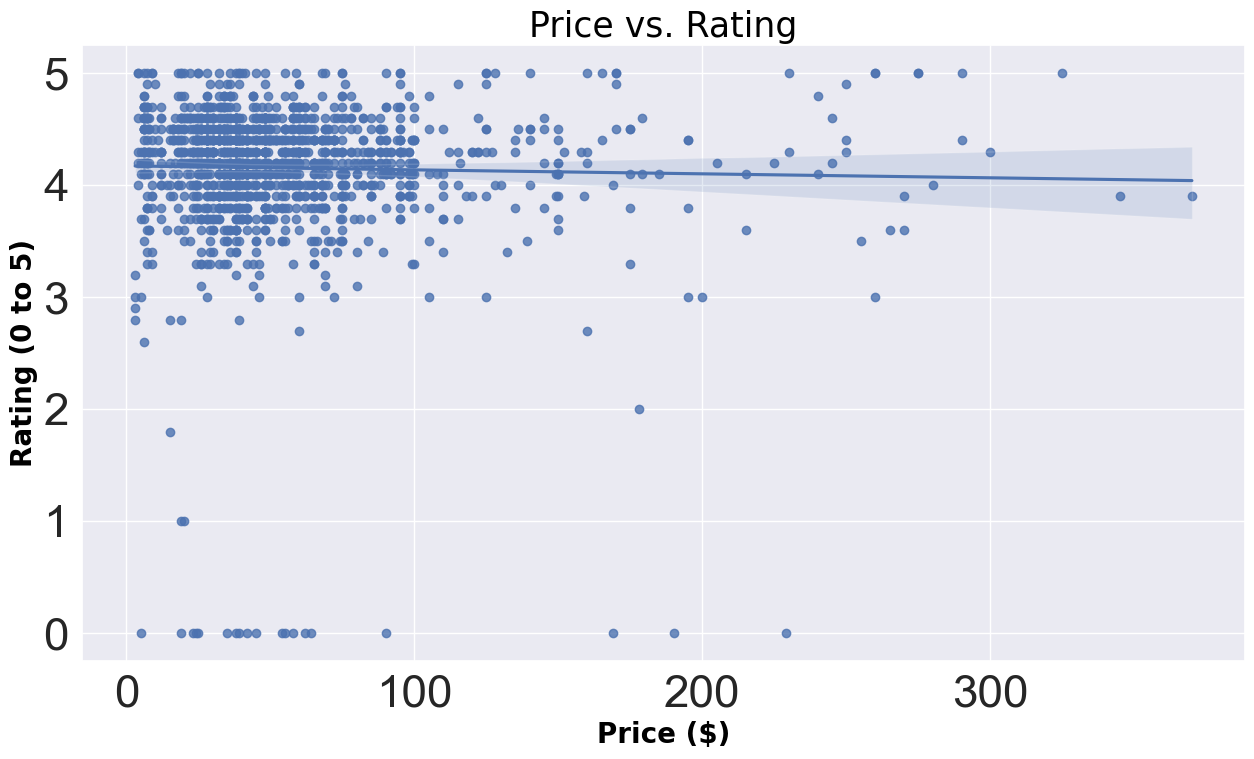

<Figure size 4000x1000 with 0 Axes>

<Figure size 4000x1000 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('cosmetics.csv')
#print(df.iloc[:,3].to_string())


#print(df.iloc[:,4].to_string())

price_list=df['Price'].tolist()
rating_list=df['Rank'].tolist()


#print(price_list)
print("\n")
#print(rating_list)

ax = sns.regplot(
    x=price_list,
    y=rating_list,
    
)

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
plt.figure(figsize=(40,10))
sns.color_palette("hls", 8)

plt.figure(figsize=(40,10))
ax.set_xlabel("Price ($)", fontdict= label_font)
# ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontdict= label_font)
# ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontdict=title_font)

plt.show()


## Brand vs. Rank

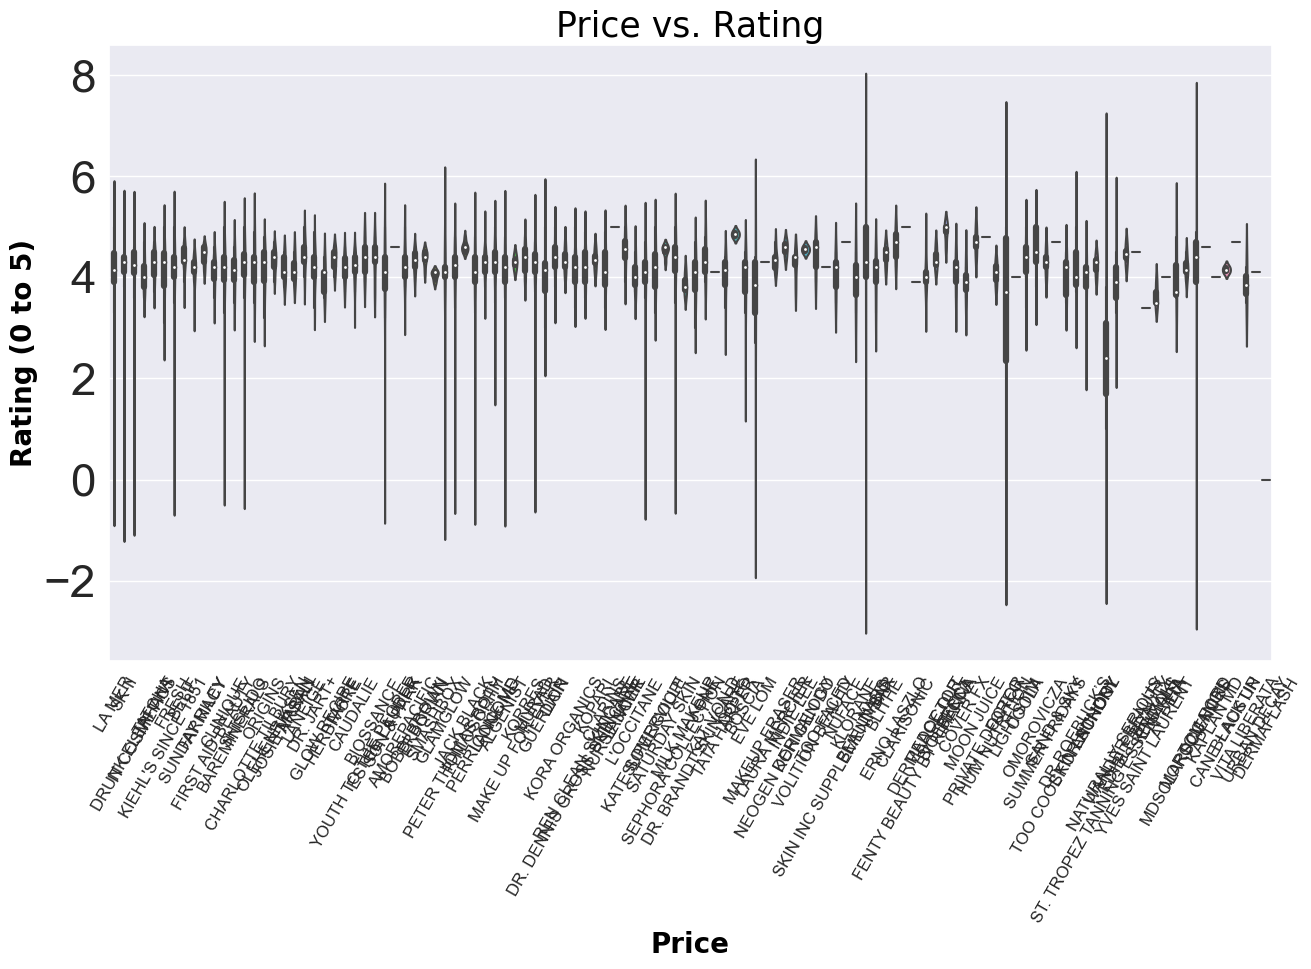

In [ ]:
df = pd.read_csv('cosmetics.csv')
#print(df.iloc[:,3].to_string())


#print(df.iloc[:,4].to_string())

brand_list=df['Brand'].tolist()
rating_list=df['Rank'].tolist()

#print(price_list)
#print("\n")
#print(rating_rank)

ax = sns.violinplot(
    x='Brand',
    y='Rank',
    data = df
)

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

#plt.figure(figsize=(400,10))
sns.set(rc={'figure.figsize':(40,8.27)})
ax.set_xlabel("Price", fontdict = label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12, rotation = 60)

ax.set_ylabel("Rating (0 to 5)", fontdict = label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
#plt.text(5, 1, 'carcinogens & mutagens', fontdict = opt_font)

#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Rating', fontdict=title_font)

plt.show()



/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/2753058050.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), size = 12)
/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/2753058050.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


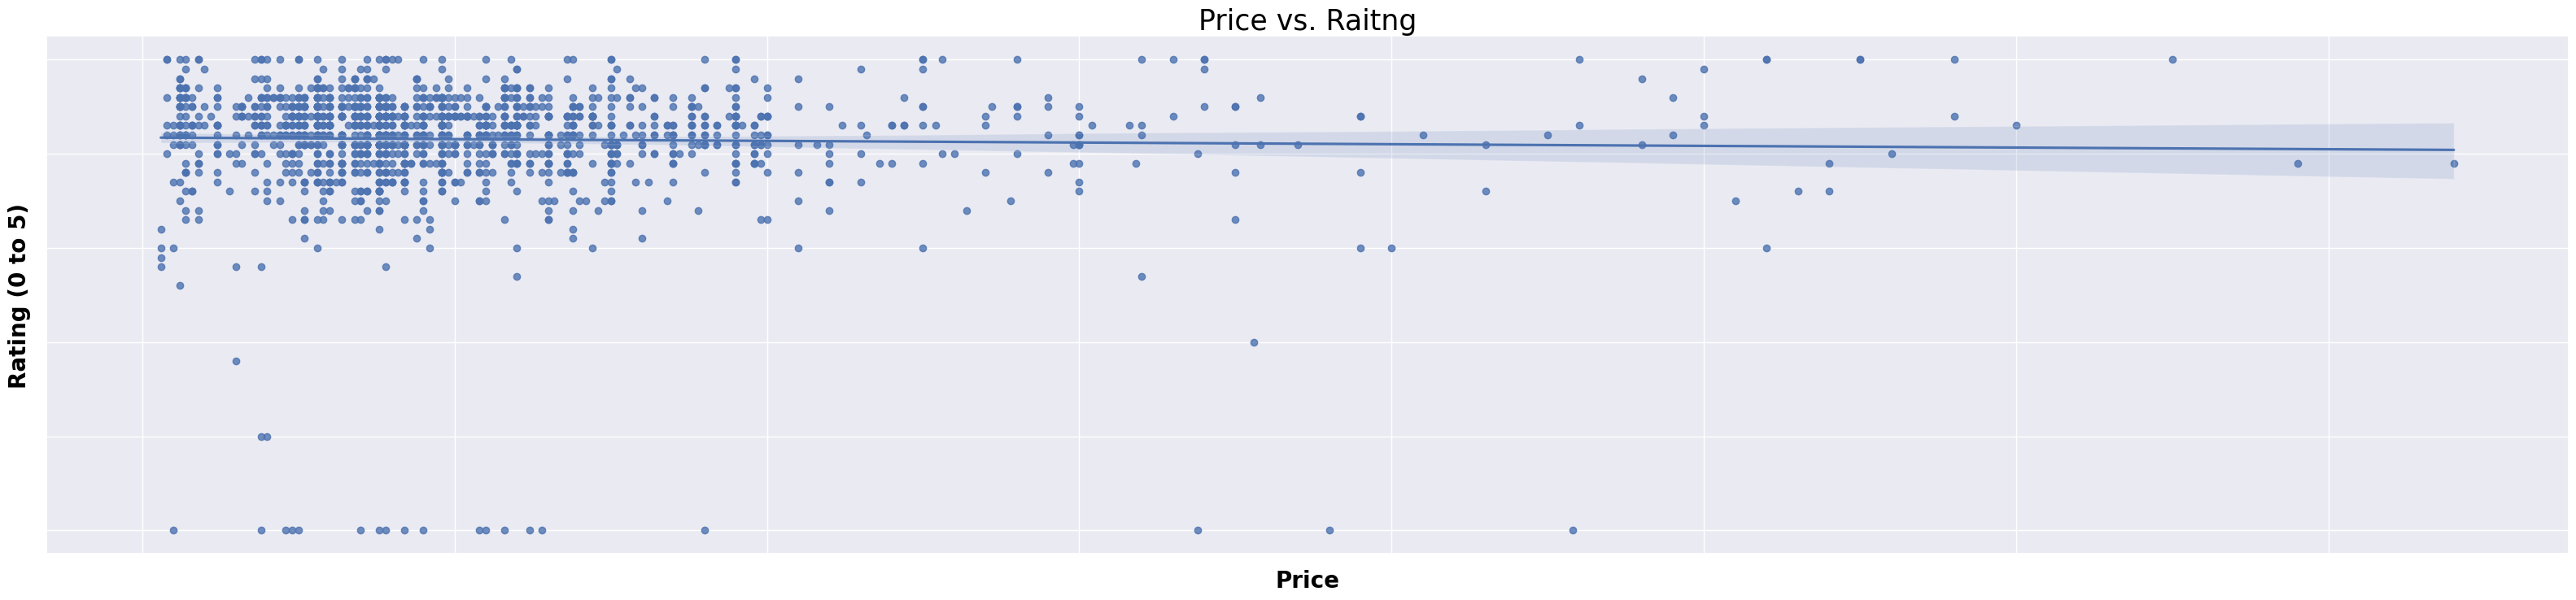

<Figure size 10000x1000 with 0 Axes>

In [ ]:
ax = sns.regplot(
    x="Price", 
    y="Rank", 
    data = df, 
    dropna=False)


x_data = ax.get_lines()[0].get_xdata()
y_data = ax.get_lines()[0].get_ydata()

#p.get_children()[1].get_paths()

#finding the slope at different points in the graph
#print(x_data)
#print(y_data)


sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 25
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

plt.figure(figsize=(100,10))
ax.set_xlabel("Price", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Rating (0 to 5)", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)


#ax.set(xlabel="Ocurrances in Products", ylabel= "Chemcials")

ax.set_title('Price vs. Raitng', fontdict=title_font)


plt.show()

/var/folders/mw/fc5wj4ns76x4xcwycqk0_bt00000gn/T/ipykernel_44646/1717685191.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), size=12)


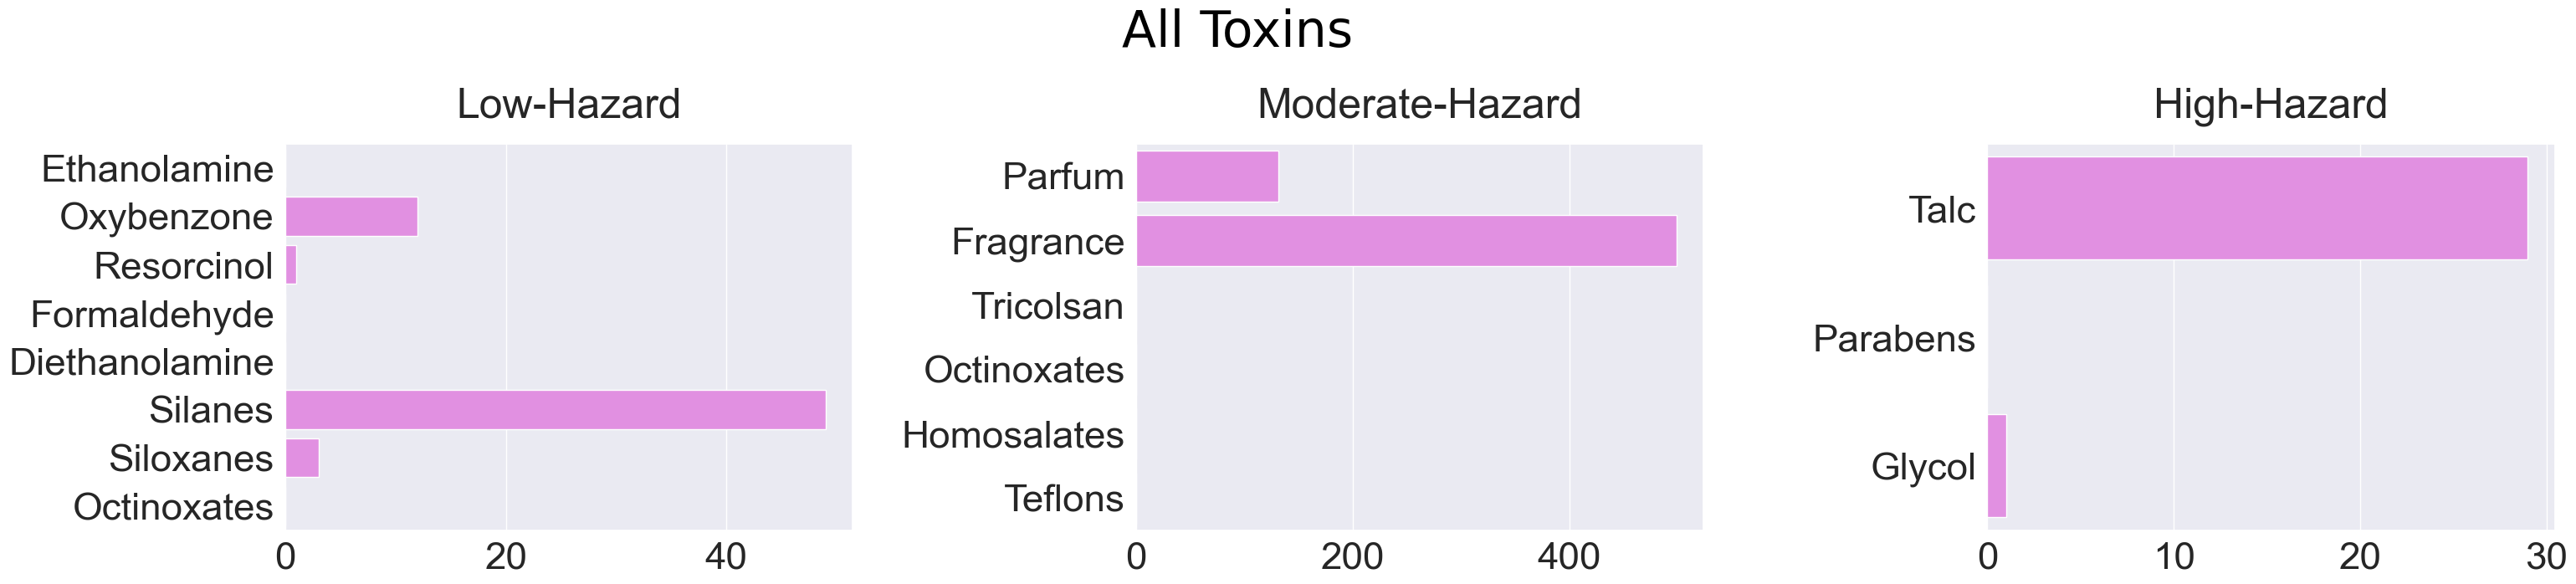

<Figure size 10000x1000 with 0 Axes>

<Figure size 10000x1000 with 0 Axes>

In [ ]:
#low hazard
ethanolamine_occ = df[df['Ingredients'].str.contains('Ethanolamine')].shape[0]
oxybenzone_occ = df[df['Ingredients'].str.contains("Oxybenzone")].shape[0]
resorcinol_occ = df[df['Ingredients'].str.contains("Resorcinol")].shape[0]
formaldehyde_occ = df[df['Ingredients'].str.contains("Formaldehyde")].shape[0]
diethanolamine_occ = df[df['Ingredients'].str.contains("Diethanol")].shape[0]
silanes_occ = df[df['Ingredients'].str.contains("Silane")].shape[0]
siloxanes_occ = df[df['Ingredients'].str.contains("Siloxane")].shape[0]
octinaxate_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]

occurances = [ethanolamine_occ, oxybenzone_occ, resorcinol_occ, formaldehyde_occ, diethanolamine_occ, silanes_occ, siloxanes_occ, octinaxate_occ]
chemicals = ['Ethanolamine', 'Oxybenzone', 'Resorcinol', 'Formaldehyde', 'Diethanolamine', 'Silanes', 'Siloxanes', 'Octinoxates']

#moderate hazard
parfum_occ = df[df['Ingredients'].str.contains("Parfum")].shape[0]
fragrance_occ = df[df['Ingredients'].str.contains("Fragrance")].shape[0]
triclosan_occ = df[df['Ingredients'].str.contains("triclosan")].shape[0]
octinoxates_occ = df[df['Ingredients'].str.contains("Octinaxate")].shape[0]
homosalate_occ = df[df['Ingredients'].str.contains("homosalate")].shape[0]
teflon_occ = df[df['Ingredients'].str.contains("teflon")].shape[0]


occurances1 = [parfum_occ, fragrance_occ, triclosan_occ, octinoxates_occ, homosalate_occ, teflon_occ]
chemicals1 = ['Parfum', 'Fragrance', 'Tricolsan', 'Octinoxates', 'Homosalates', 'Teflons']

#high hazard
talc_occ = df[df['Ingredients'].str.contains("Talc")].shape[0]
parabens_occ = df[df['Ingredients'].str.contains("Parabens")].shape[0]
glycol_occ = df[df['Ingredients'].str.contains("Polyethylene Glycol")].shape[0]

occurances2 = [talc_occ, parabens_occ, glycol_occ]
chemicals2 = ['Talc', 'Parabens', 'Glycol']

#total_chem = chemicals + chemicals1 + chemicals2 for swarmplot

fig,axs = plt.subplots(ncols = 3, figsize=(35,6))
sns.barplot(x=occurances, y=chemicals,  color = 'violet', ax=axs[0])
sns.barplot(x=occurances1, y=chemicals1,  color = 'violet', ax=axs[1])
sns.barplot(x=occurances2, y=chemicals2,  color = 'violet', ax=axs[2])

sns.set(font_scale=2)
sns.set(font="Georgia")

title_font = {
    'family': 'Baskerville Old Face',
    'color': 'black',
    'weight': '400',
    'size': 50
    
}
label_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': 'bold',
    'size': 20
}

opt_font = {
    'family': 'Franklin Gothic Medium',
    'color': 'black',
    'weight': '100',
    'size': 12
}

sns.set(font_scale = 3)
sns.color_palette("hls", 8)

plt.figure(figsize=(100,10))

plt.figure(figsize=(100,10))

ax.set_xlabel("Occurances", fontdict= label_font)
ax.set_xticklabels(ax.get_xticklabels(), size = 12)

ax.set_ylabel("Toxin", fontdict= label_font)
ax.set_yticklabels(ax.get_yticklabels(), size=12)


fig.suptitle('All Toxins', fontdict= title_font, y=1.15, x=.45)

fig.subplots_adjust(hspace=5, wspace=0.5)

axs[0].set_title('Low-Hazard', y=1.05)
axs[1].set_title('Moderate-Hazard', y=1.05)
axs[2].set_title('High-Hazard', y=1.05)

plt.show()
